In [59]:
import geopandas as gpd
import pandas as pd
import momepy
import matplotlib.pyplot as plt
import requests
import pickle as pkl
import numpy as np

In [8]:
mapa = gpd.read_file("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/rawdata/Censo 2010 (Municipal)/inegi_refcenmuni_2010.shp", 
                    encoding = 'latin')

In [18]:
url = 'https://es.wikipedia.org/wiki/Zona_metropolitana_del_valle_de_M%C3%A9xico'
html = requests.get(url).content
df_list = pd.read_html(html)
df = df_list[1]

In [28]:
zmvm = df[0].to_numpy()

In [38]:
mapa['inZMVM'] = mapa['cve_umun'].apply(lambda x: 1 if x in zmvm else 0)

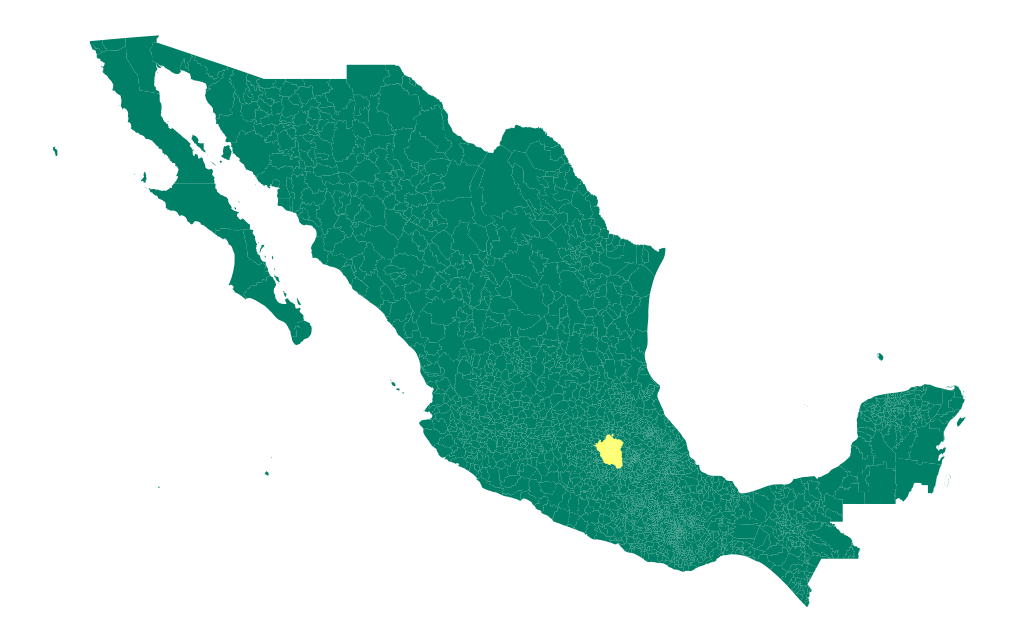

In [52]:
fig, ax = plt.subplots()

mapa.plot('inZMVM', ax = ax, cmap = 'summer')

ax.set_axis_off()
fig.set_size_inches(18, 15)
plt.show()

In [63]:
with open("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/rawdata/cve_umun.pkl", "rb") as file:
    mismun = pkl.load(file)

In [53]:
ZMVMtotal = mapa[mapa.inZMVM == 1]

In [67]:
miZMVM = ZMVMtotal[ZMVMtotal.cve_umun.isin(mismun)]

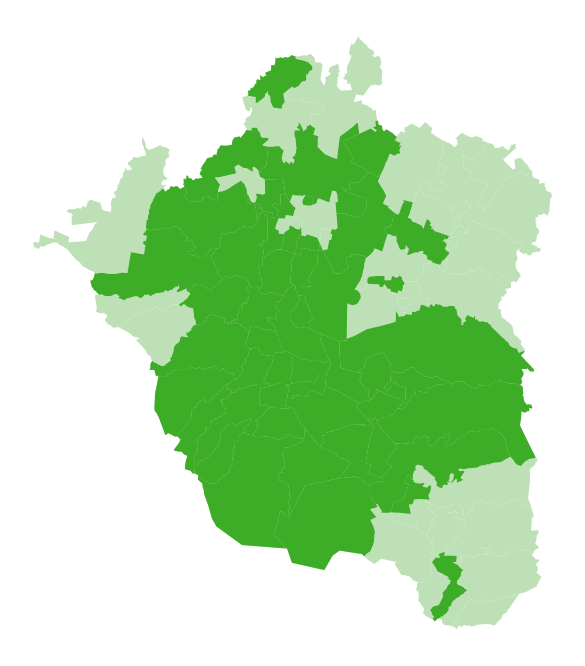

In [72]:
fig, ax = plt.subplots()

ZMVMtotal.plot(ax = ax, color = '#BEE0B7')
miZMVM.plot(ax= ax, color = '#3DAC27')

ax.set_axis_off()
fig.set_size_inches(12, 12)
plt.show()